In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
df = pd.read_pickle('../input/features.pickle')

In [3]:
X = np.array(df.drop(['PassengerId','Survived'], axis=1))
y = np.array(df['Survived'])

LR: 0.824944 (0.033232)
SVM: 0.830524 (0.033887)
RFC: 0.789051 (0.040436)
GBC: 0.820474 (0.033758)
GNB: 0.759863 (0.034167)


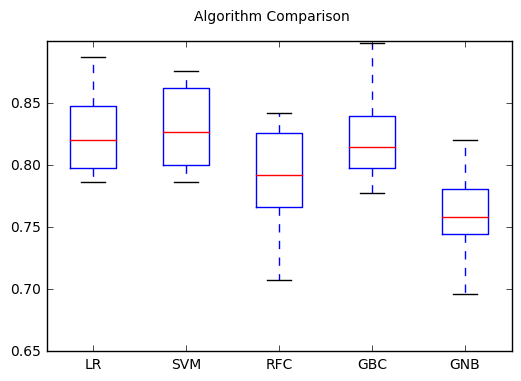

In [4]:
num_fold = 10
num_instances = len(X)
seed = 7

models = [('LR', LogisticRegression()),
          ('SVM', SVC()),
          ('RFC', RandomForestClassifier()),
          ('GBC', GradientBoostingClassifier()),
          ('GNB', GaussianNB())]

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=num_fold, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, 
                                                 cv=kfold,
                                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()